In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt


In [5]:
ess2002 = pd.read_stata("ESS_DATA/2002/ESS1e06_5.dta",convert_categoricals = False)
display(ess2002.head())

,name,essround,edition,proddate,cntry,idno,tvtot,tvpol,rdtot,rdpol,...,inwshh,inwsmm,inwehh,inwemm,inwtm,spltadm,supqadm,dweight,pspwght,pweight
0,ESS1e06_5,1.0,6.5,01.12.2016,AT,1.0,1.0,1.0,1.0,1.0,...,13.0,30.0,14.0,20.0,50.0,10.0,1.0,0.9452,0.940933,0.271488
1,ESS1e06_5,1.0,6.5,01.12.2016,AT,2.0,3.0,2.0,4.0,1.0,...,14.0,0.0,15.0,0.0,60.0,9.0,1.0,0.4726,0.470466,0.271488
2,ESS1e06_5,1.0,6.5,01.12.2016,AT,3.0,7.0,3.0,0.0,66.0,...,18.0,0.0,19.0,10.0,70.0,10.0,1.0,0.9452,1.392155,0.271488
3,ESS1e06_5,1.0,6.5,01.12.2016,AT,4.0,1.0,1.0,1.0,1.0,...,11.0,55.0,13.0,0.0,65.0,9.0,1.0,0.9452,1.382163,0.271488
4,ESS1e06_5,1.0,6.5,01.12.2016,AT,6.0,0.0,66.0,1.0,1.0,...,12.0,55.0,13.0,55.0,60.0,9.0,1.0,1.8905,1.437766,0.271488


In [10]:
# print(len(list(ess2002.columns.values)))

In [6]:
ideo = pd.melt(ess2002,id_vars = "cntry",value_vars = "lrscale")


# the scale is from 0 to 10 ! bigger then that are typos or "don't know"
ideo = ideo.loc[ideo["value"]<=10.0]
display(ideo.head())

,cntry,variable,value
0,AT,lrscale,6.0
1,AT,lrscale,6.0
2,AT,lrscale,5.0
3,AT,lrscale,5.0
4,AT,lrscale,5.0


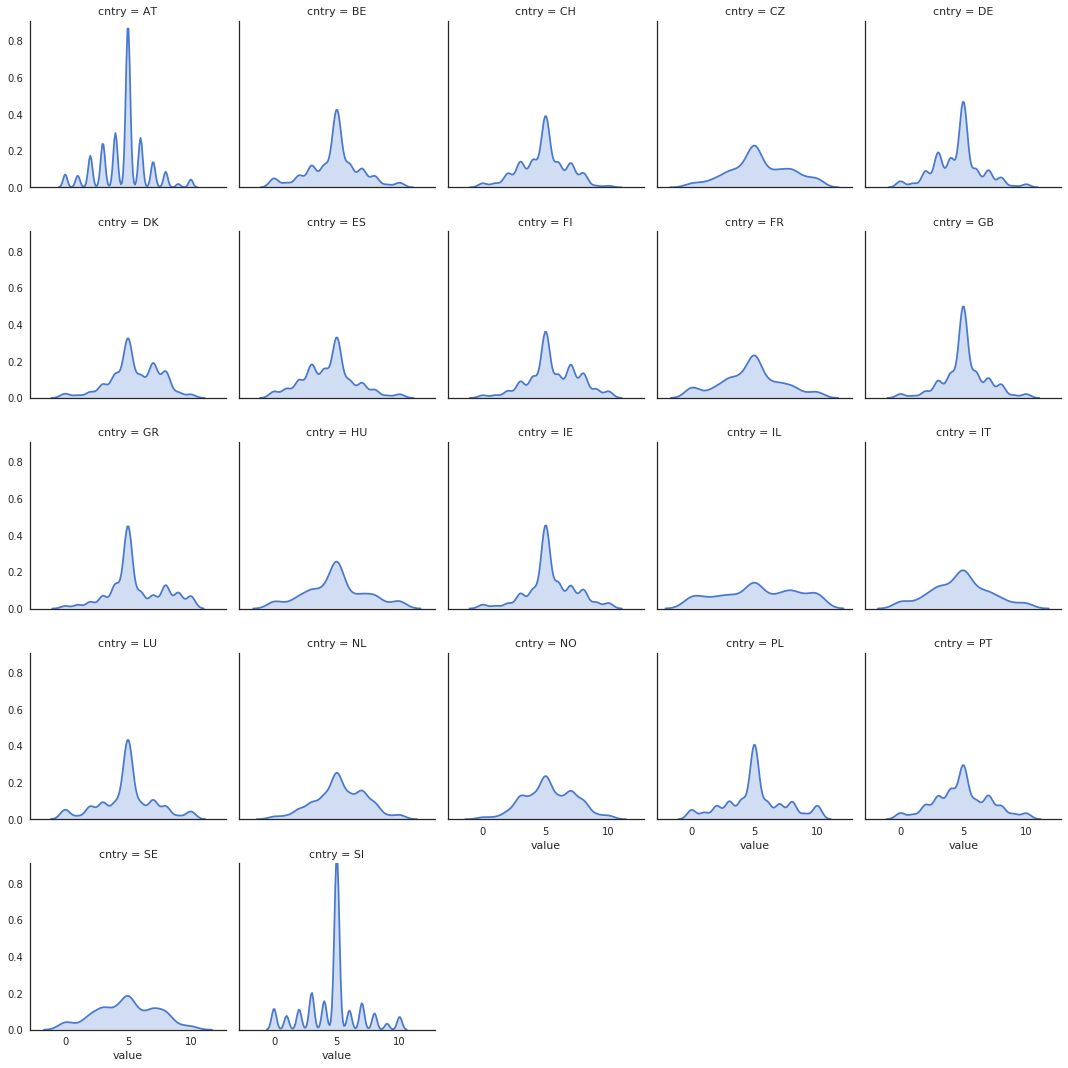

In [41]:
sns.set(style="white", palette="muted", color_codes=True)    
g = sns.FacetGrid(ideo,col = "cntry", col_wrap = 5)
plt.ylabel("Densidade")
plt.xlabel("Posição Política - Esquerda x Direita")
g = g.map(sns.distplot, "value",hist = False, kde_kws={"shade": True})
plt.savefig("ess2002plots.pdf",dpi = 200)

In [ ]:
#display(ideo)
#print(len(ideo.groupby("cntry").count()))
#ideo.groupby("cntry").count()
#print(len(ess2002.index))
# ideo["cntry"].describe()
#ideo["cntry"].unique()
#ess2002cntry = dict()
#for i in ideo["cntry"].unique():
#   ess2002cntry[i] = ideo.loc[ideo["cntry"] == i]
# display(ideo)

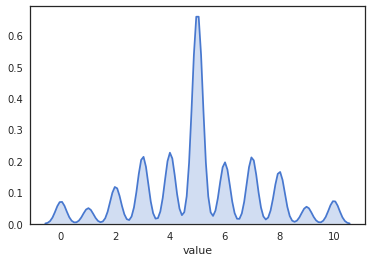

In [42]:
sns.distplot(ideo["value"],hist = False,kde_kws={"shade": True})